# Deep Learning - Assignment 1

- Feed synthetic dataset to the neural network created
- create loss curve

In [379]:
%matplotlib inline
import math
from math import log
import numpy as np
import random
from data import load_synth
from random import random
from itertools import starmap
from operator import mul
import matplotlib.pyplot as plt
import matplotlib as mpl
#from tqdm import tqdm, trange
import sys

1 - Loading Synthetic Dataset

In [380]:
(xtrain, ytrain), (xtest, ytest), num_classes = load_synth()

In [381]:
xtrain = (xtrain/255).astype('float32')
xtest = (xtest/255).astype('float32')

In [382]:
#Train Set
onehot_y = np.zeros((ytrain.size, ytrain.max()+1))
onehot_y[np.arange(ytrain.size),ytrain] = 1
# Test Set
onehot_y_test = np.zeros((ytest.size, ytest.max()+1))
onehot_y_test[np.arange(ytest.size),ytest] = 1

In [383]:
xtrain_list = xtrain.tolist()
ytrain_list = onehot_y.tolist()

##Test Set
xtest_list = xtest.tolist()
ytest_list = onehot_y_test.tolist()

In [384]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [385]:
def softmax(X):
    numerator = np.exp(X)
    denominator = np.sum(np.exp(X))
    return numerator/denominator

2 - Initialize the model's parameters

In [386]:
def initialize_weights():

    W = ([[ 2.8684894690, -7.6767074810, 6.6785715480], [-1.6898393820, -2.0112816210, -7.7109503230]])
    b = ([0., 0., 0.])
    V = ([[-7.2348454540, 1.1665972450], [1.9808355760, -7.8209344560], [5.7780672930, -8.5619845400]])
    c = ([0., 0.])
    
    parameters = {"W": W,
                  "b": b,
                  "V": V,
                  "c": c
                  }
    
    
    return parameters

In [387]:
parameters = initialize_weights()
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))
print("V = " + str(parameters["V"]))
print("c = " + str(parameters["c"]))

W = [[2.868489469, -7.676707481, 6.678571548], [-1.689839382, -2.011281621, -7.710950323]]
b = [0.0, 0.0, 0.0]
V = [[-7.234845454, 1.166597245], [1.980835576, -7.820934456], [5.778067293, -8.56198454]]
c = [0.0, 0.0]


3 - Implement forward_propagation

In [388]:
def forward_propagation_synth(X, parameters):
    """
    Returns:
    y -- The softmax output of the second activation
    cache -- a dictionary containing "k", "h", "y" and "y"
    """
    # Retrieve each parameter from the dictionary "parameters"

    W = parameters["W"]
    b = parameters["b"]
    V = parameters["V"]
    c = parameters["c"]
        
    k1 = ([0., 0., 0.])
    h = ([0., 0., 0.])
    k2 = ([0., 0.])
    y = ([0., 0.])
    
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    transpose_W = list(map(list, zip(*W))) # transpose_W =3 X 2
    transpose_V = list(map(list, zip(*V))) 

    for j in range(len(transpose_W)):
        for i in range(len(X)):
            k1[j] += W[i][j] * X[i]
        k1[j] += b[j]
    
    for i in range(len(k1)):
        h[i] = sigmoid(k1[i])
    
    for j in range(len(transpose_V)):
        for i in range(len(h)):
            k2[j] += V[i][j] * h[i]
        k2[j] += c[j]
    
    y = softmax(k2)
    
    cache = { "k1": k1,
              "h": h,
              "k2": k2,
              "y": y}
    
   # print(cache)
    
    return y, cache

In [389]:
def cross_entropy(p,y):
    log_likelihood = 0.0
    for i in range(len(p)):
        log_likelihood += -1 * y[i] * log(p[i])
    
    loss = log_likelihood
    return loss

In [390]:
def backward_propagation_synth(parameters, cache ,X, Y):
    """
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    # First, W and V and retrived from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    V = parameters["V"]
    c = parameters["c"]
    
    transpose_W = list(map(list, zip(*W)))
    transpose_V = list(map(list, zip(*V)))
        
    # Retrieved also k1 and k2 from dictionary "cache".
    k1 = cache["k1"]
    h = cache["h"]
    k2 = cache["k2"]  
    y = cache["y"]
    
    dW = ([[0., 0., 0.], [0., 0., 0.]])
    db = ([0., 0., 0.])
    dV = ([[0., 0.], [0., 0.],[0., 0.]])
    dc = ([0., 0.])
    
    dk1 = ([0., 0., 0.])
    dh = ([0., 0., 0.])
    dk2 = ([0., 0.])
    dy = ([0., 0.])
    
    dk2 = y - Y
    #print(dk2)
    
    for i in range(len(transpose_W)):
        for j in range(len(k2)):
            dV[i][j] = dk2[j] * h[i]
            dh[i] += dk2[j] * V[i][j]

    dc = dk2
    #print(dc)

    for i in range(len(transpose_W)):
        dk1[i] = dh[i] * h[i] * (1 - h[i])
    #print(dk1)
    
    for j in range(len(transpose_W)):
        for i in range(len(X)):
            dW[i][j] = dk1[j] * X[i]
        db[j] = dk1[j]
    #print(db)

    
    
    grads = {"dk1": dk1,
             "db": db,
             "dk2": dk2,
             "dc": dc}
    
    return grads

In [391]:
def update_parameters_synth(parameters, grads, learning_rate = 1e-2):
    """
    Updates parameters using the gradient descent update rule given above
     
    """
    # Retrieve each parameter from the dictionary "parameters"
    W = parameters["W"]
    b = parameters["b"]
    V = parameters["V"]
    c = parameters["c"]
    
    # Retrieve each gradient from the dictionary "grads"
    dk1 = grads["dk1"]
    db = grads["db"]
    dk2 = grads["dk2"]
    dc = grads["dc"]
    
    dk1 = np.asarray(dk1)
    db = np.asarray(db)
    dk2 = np.asarray(dk2)
    dc = np.asarray(dc)
    
    # Update rule for each parameter
    W = W - dk1 * learning_rate
    b = b - db * learning_rate
    V = V - dk2 * learning_rate
    c = c - dc * learning_rate
    
    parameters = {"W": W,
                  "b": b,
                  "V": V,
                  "c": c}
    
    return parameters

In [392]:
def nn_model(X, Y, epochs = 5):
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_weights()
    
    loss = list()
    m = len(X)
    cost_all = list()
    # Loop (gradient descent)

    for i in range(epochs):       
        cost = 0
        for data in range(len(X)):
             
            # Forward propagation. 
            output, cache = forward_propagation_synth(X[data], parameters)
            
            # Cost function.
            
            cost += cross_entropy(output, Y[data])
            cost_all.append(cross_entropy(output, Y[data]))
            
            # Backpropagation. 
            grads = backward_propagation_synth(parameters, cache, X[data], Y[data])
 
            # Gradient descent parameter update. 
            parameters = update_parameters_synth(parameters, grads)
        
        loss.append(cost/m)
        print (f"Loss after iteration {i}: {loss[i]}")
    
    return loss, cost_all

In [393]:
loss_train = list()
loss_test = list()
cost_all_train = list()
cost_all_test = list()
loss_train, cost_all_train = nn_model(xtrain_list, ytrain_list, epochs=50)
loss_test, cost_all_test = nn_model(xtest_list, ytest_list, epochs=50)


Loss after iteration 0: 0.7020339131770178
Loss after iteration 1: 0.6946460538870367
Loss after iteration 2: 0.6924208265622442
Loss after iteration 3: 0.6917682808364556
Loss after iteration 4: 0.6915029567086266
Loss after iteration 5: 0.6913639537083309
Loss after iteration 6: 0.6912786613584743
Loss after iteration 7: 0.6912208334962506
Loss after iteration 8: 0.691178915606482
Loss after iteration 9: 0.691147055015615
Loss after iteration 10: 0.6911219702656924
Loss after iteration 11: 0.6911016763924884
Loss after iteration 12: 0.6910849002943377
Loss after iteration 13: 0.691070786677269
Loss after iteration 14: 0.6910587389250002
Loss after iteration 15: 0.6910483277298448
Loss after iteration 16: 0.6910392360048877
Loss after iteration 17: 0.6910312242833466
Loss after iteration 18: 0.6910241082174525
Loss after iteration 19: 0.6910177435016148
Loss after iteration 20: 0.6910120155044605
Loss after iteration 21: 0.6910068319748144
Loss after iteration 22: 0.6910021178058346
L

In [394]:
BLUE = '#3F6797'
# \definecolor{cbl}{HTML}{4F81BD}
# \definecolor{cbll}{HTML}{7BA1CD}
# \definecolor{cblll}{HTML}{A7C0DE}

In [395]:
def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

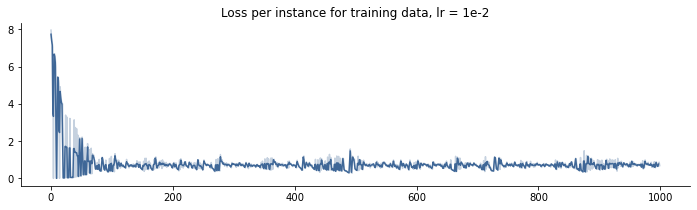

In [396]:
tlb = cost_all_train[:1000]

plt.figure(figsize=(12, 3))
plt.plot(tlb, color = BLUE, alpha=0.3)

k = 2
smoothed, idx = [], []
for to in range(k, len(tlb)):
    fr = to - k
    smoothed.append(sum(tlb[fr:to])/k)
    idx.append(to)
    
plt.plot(smoothed, color = BLUE)
plt.title('Loss per instance for training data, lr = 1e-2')
clean()

In [397]:
### Plotting for Cross Entropy Loss and Accuracy on Training Set 

def training_validation_loss(loss_train, loss_test):
        # Create count of the number of epochs
        epoch_count = range(1, len(loss_train) + 1)
        #plotting
        plt.plot(epoch_count,loss_train,"-b", label=" training")
        plt.plot(epoch_count,loss_test, "-r", label="test")
        plt.ylabel('Cross Entropy Loss')
        plt.xlabel('Epoch')
        plt.xticks(rotation=60)
        plt.title('Loss w.r.t. epoch for learning rate = 1e-2')
        plt.legend(["training","test"], loc ="upper right") 
        plt.show()



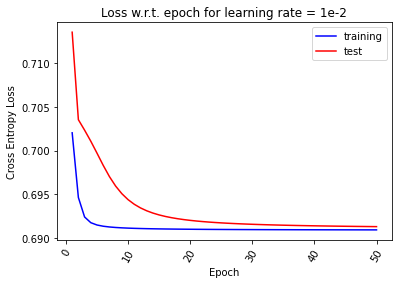

In [398]:
training_validation_loss(loss_train,loss_test)